<a href="https://colab.research.google.com/github/cappelchi/Atlas_contest/blob/master/Atlas_contest_1_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Первое задание конкурса
https://habr.com/ru/company/atlasbiomed/blog/480954/

Используя тестовый датасет из 12 образцов Data/Test/CEI.1kg.2019.test.vcf.gz, составьте их родословную, руководствуясь результатами определения пола и kinship анализа. Образцы, которые по результатам анализа не находятся в родственных связях с кем-либо, запишите рядом, не соединяя их линией с другими образцами. Родословная может быть составлена в стилистике, аналогичной Рисунку 1, однако это остается на ваше усмотрение. Мужчины обозначаются квадратом, женщины — кругом, брак — горизонтальной линией, ребенок — вертикальной линией, несколько детей — горизонтальным разветвлением вертикальной линии (в виде буквы П). Подробнее про эти обозначения можно почитать здесь.

Как мы писали выше, kinship коэффициенты не могут однозначно охарактеризовать родство того или иного порядка: одинаковые kinship коэффициенты получаются при сравнении пар родитель — ребенок и брат — сестра (родство первого порядка). При невозможности установить характер родственной связи, укажите любую из возможных. Обратите внимание, что образцы в тестовом датасете имеют отличные от используемых в датасете для обучения идентификаторы.

In [0]:
#home
#└── ubuntu
#    ├── Data
#    │   ├── Test
#    │   │   ├── CEI.1kg.2019.test.vcf.gz
#    │   │   └── CEI.1kg.2019.test.vcf.gz.tbi
#    │   └── Tutorial
#    │       ├── CEI.1kg.2019.demo.vcf.gz
#    │       └── CEI.1kg.2019.demo.vcf.gz.tbi
#    ├── Technical
#    │   ├── external_interpretation_rsids.txt
#    │   └── rsids_for_subsetting.txt
#    └── Tools
#        ├── convert_plink_delimiter.sh
#        └── create_23andme.sh

In [0]:
!pip install pandas
!pip install PyVCF
!pip install pysam
!pip install networkx
!pip install matplotlib

In [0]:
import pandas as pd
import vcf
import pysam

In [0]:
vcf_reader = vcf.Reader(filename='Data/Test/CEI.1kg.2019.test.vcf.gz')

In [0]:
vcf_reader.samples

['AT0038',
 'AT0006',
 'AT0030',
 'AT0093',
 'AT0075',
 'AT0066',
 'AT0061',
 'AT0090',
 'AT0070',
 'AT0023',
 'AT0047',
 'AT0041']

In [0]:
sample_num = {}
for cnt, sample in enumerate(vcf_reader.samples):
    sample_num[sample] = cnt

In [0]:
is_male = {}
for sample in vcf_reader.samples:
    collect_gt = []
    for cnt, record in enumerate(vcf_reader.fetch('chrX', 2699521, 154931043)):
        #rec_gt = record.samples[0]
        #print (record.samples[0]['GT'])
        collect_gt.append(len(record.samples[sample_num[sample]]['GT']))
        if cnt > 10:
            break
    is_male[sample] = (max(collect_gt) == 1)
#print (is_male)

In [0]:
for key, value in is_male.items():
    if value:
        print (key, ' is male')
    else:
        print (key, ' is female') 

AT0070  is female
AT0066  is male
AT0030  is female
AT0006  is female
AT0090  is female
AT0075  is female
AT0041  is male
AT0047  is female
AT0038  is male
AT0023  is female
AT0061  is male
AT0093  is male


In [0]:
!plink --vcf 'Data/Test/CEI.1kg.2019.test.vcf.gz' --memory 28000 --exclude 'Technical/rsids_for_subsetting.txt' --make-bed --out CEI_test1

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CEI_test1.log.
Options in effect:
  --exclude Technical/rsids_for_subsetting.txt
  --make-bed
  --memory 28000
  --out CEI_test1
  --vcf Data/Test/CEI.1kg.2019.test.vcf.gz

32175 MB RAM detected; reserving 28000 MB for main workspace.
--vcf: CEI_test1-temporary.bed + CEI_test1-temporary.bim +
CEI_test1-temporary.fam written.
85157640 variants loaded from .bim file.
12 people (0 males, 0 females, 12 ambiguous) loaded from .fam.
Ambiguous sex IDs written to CEI_test1.nosex .
--exclude: 83866869 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 12 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868

In [0]:
!king -b CEI_test1.bed --kinship --prefix CEI_test1

KING 2.2.4 - (c) 2010-2019 Wei-Min Chen

The following parameters are in effect:
                   Binary File :   CEI_test1.bed (-bname)

Additional Options
         Close Relative Inference : --related, --duplicate
   Pairwise Relatedness Inference : --kinship [ON], --ibdseg, --ibs, --homog
              Inference Parameter : --degree
         Relationship Application : --unrelated, --cluster, --build
                        QC Report : --bysample, --bySNP, --roh, --autoQC
                     QC Parameter : --callrateN, --callrateM
             Population Structure : --pca, --mds
              Structure Parameter : --projection, --pcs
              Disease Association : --tdt
   Quantitative Trait Association : --mtscore
                Association Model : --trait [], --covariate []
            Association Parameter : --invnorm, --maxP
               Genetic Risk Score : --risk, --model [], --prevalence, --noflip
              Computing Parameter : --cpus
                   Optiona

In [1]:
!wget --no-check-certificate --content-disposition https://github.com/cappelchi/Atlas_contest/blob/master/CEI_test1.kin0
!curl -LJO https://raw.githubusercontent.com/cappelchi/Atlas_contest/master/CEI_test1.kin0

--2020-02-20 06:18:03--  https://github.com/cappelchi/Atlas_contest/blob/master/CEI_test1.kin0
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘CEI_test1.kin0’

CEI_test1.kin0          [ <=>                ]  79.58K  --.-KB/s    in 0.03s   

2020-02-20 06:18:03 (2.94 MB/s) - ‘CEI_test1.kin0’ saved [81495]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3926  100  3926    0     0  21107      0 --:--:-- --:--:-- --:--:-- 21107


In [0]:
df_kin = pd.read_csv('CEI_test1.kin0', sep = '\t')

In [6]:
df_kin.head()

,FID1,ID1,FID2,ID2,N_SNP,HetHet,IBS0,Kinship
0,AT0038,AT0038,AT0006,AT0006,77930368,0.0114,0.0057,-0.0017
1,AT0038,AT0038,AT0030,AT0030,77930183,0.0113,0.0056,0.0003
2,AT0038,AT0038,AT0093,AT0093,77931660,0.0076,0.0096,-0.3177
3,AT0038,AT0038,AT0075,AT0075,77931463,0.0084,0.0086,-0.2089
4,AT0038,AT0038,AT0066,AT0066,77931345,0.0082,0.0088,-0.2305


In [7]:
df_kin[df_kin.Kinship > 0.0442]

,FID1,ID1,FID2,ID2,N_SNP,HetHet,IBS0,Kinship
7,AT0038,AT0038,AT0070,AT0070,77919548,0.0181,0.0001,0.2466
17,AT0006,AT0006,AT0070,AT0070,77919526,0.0181,0.0001,0.2469
35,AT0093,AT0093,AT0023,AT0023,77921916,0.0130,0.0001,0.2192
42,AT0075,AT0075,AT0023,AT0023,77921802,0.0148,0.0001,0.2494
55,AT0061,AT0061,AT0041,AT0041,77922036,0.0145,0.0001,0.2529
65,AT0047,AT0047,AT0041,AT0041,78075838,0.0137,0.0001,0.2368


In [0]:
df_kin['graph'] = 0
df_kin['graph'] = [0 if x < 0.0442 else 4 if x < 0.0884 else 3
                   if x < 0.177 else 2 if x < 0.354 else 1
                   for x in df_kin.Kinship]

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
pedegree = nx.Graph()
for edge1, edge2, weight in zip(df_kin.ID1, df_kin.ID2, df_kin.graph):
    if weight:
        pedegree.add_edge(edge1, edge2, weight = weight)

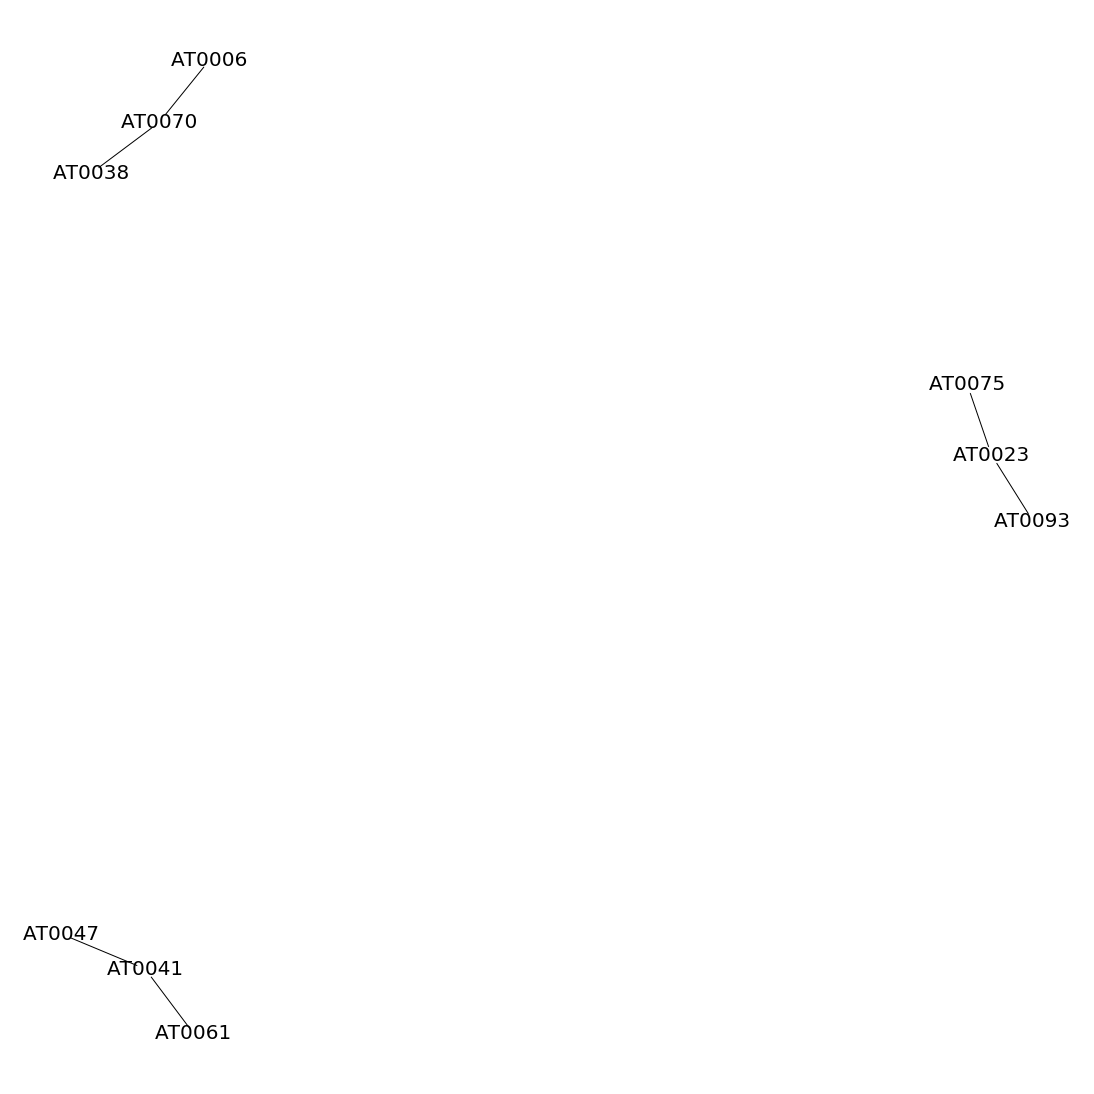

In [11]:
%matplotlib inline
plt.figure(figsize=(15,15))
nx.draw(pedegree, cmap = plt.get_cmap('rainbow'), with_labels=True,
        node_color = 'white', font_size = 20)